In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
customer = pd.read_csv('Customer.csv')
transaction = pd.read_csv('Transactions.csv')
product_category = pd.read_csv('prod_cat_info.csv')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [4]:
merge1 = pd.merge(left=transaction,
                  right=customer,
                  left_on='cust_id',
                  right_on='customer_Id',
                  how = 'inner'
                 )

In [5]:
Customer_Final = pd.merge(left = merge1,
                          right= product_category,
                          left_on=['prod_cat_code','prod_subcat_code'],
                          right_on=['prod_cat_code','prod_sub_cat_code'],
                          how = 'inner'                         
                         )

<h3> 2. Prepare a summary report for the merged data set.<br>
     a. Get the column names and their corresponding data types<br>
     b. Top/Bottom 10 observations<br>
     c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)<br>
     d. Frequency tables for all the categorical variables
 
</h3>

In [6]:
#a

Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  customer_Id        23053 non-null  int64  
 11  DOB                23053 non-null  object 
 12  Gender             23044 non-null  object 
 13  city_code          23045 non-null  float64
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [7]:
#b

#Top 10 
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,1,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,1,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,1,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,1,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,1,Women


In [8]:
#Bottom 10
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,4,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,4,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,4,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,4,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,4,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,4,Women


In [9]:
#c

Customer_Final.describe().iloc[3:8]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,266783.0,1.0,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,268935.0,3.0,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,270980.0,5.0,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,273114.0,8.0,10.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,275265.0,10.0,12.0


### d. Frequency tables for all the categorical variables

In [10]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  customer_Id        23053 non-null  int64  
 11  DOB                23053 non-null  object 
 12  Gender             23044 non-null  object 
 13  city_code          23045 non-null  float64
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [11]:
category_column = Customer_Final[["Gender","Store_type","prod_cat","prod_subcat"]]

In [12]:
print(category_column['Gender'].value_counts(),end='\n\n\n')
print(category_column['Store_type'].value_counts(),end='\n\n\n')
print(category_column[['prod_cat','prod_subcat']].value_counts())

M    11811
F    11233
Name: Gender, dtype: int64


e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64


prod_cat          prod_subcat        
Home and kitchen  Tools                  1062
Footwear          Women                  1048
Books             Fiction                1043
Home and kitchen  Kitchen                1037
Books             Children               1035
Electronics       Mobiles                1031
Books             Comics                 1031
Home and kitchen  Bath                   1023
Footwear          Kids                   1009
Home and kitchen  Furnishing             1007
Clothing          Women                  1005
Books             Non-Fiction            1004
Bags              Mens                   1003
                  Women                   995
Books             DIY                     989
Clothing          Kids                    988
Electronics       Cameras                 985
    

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

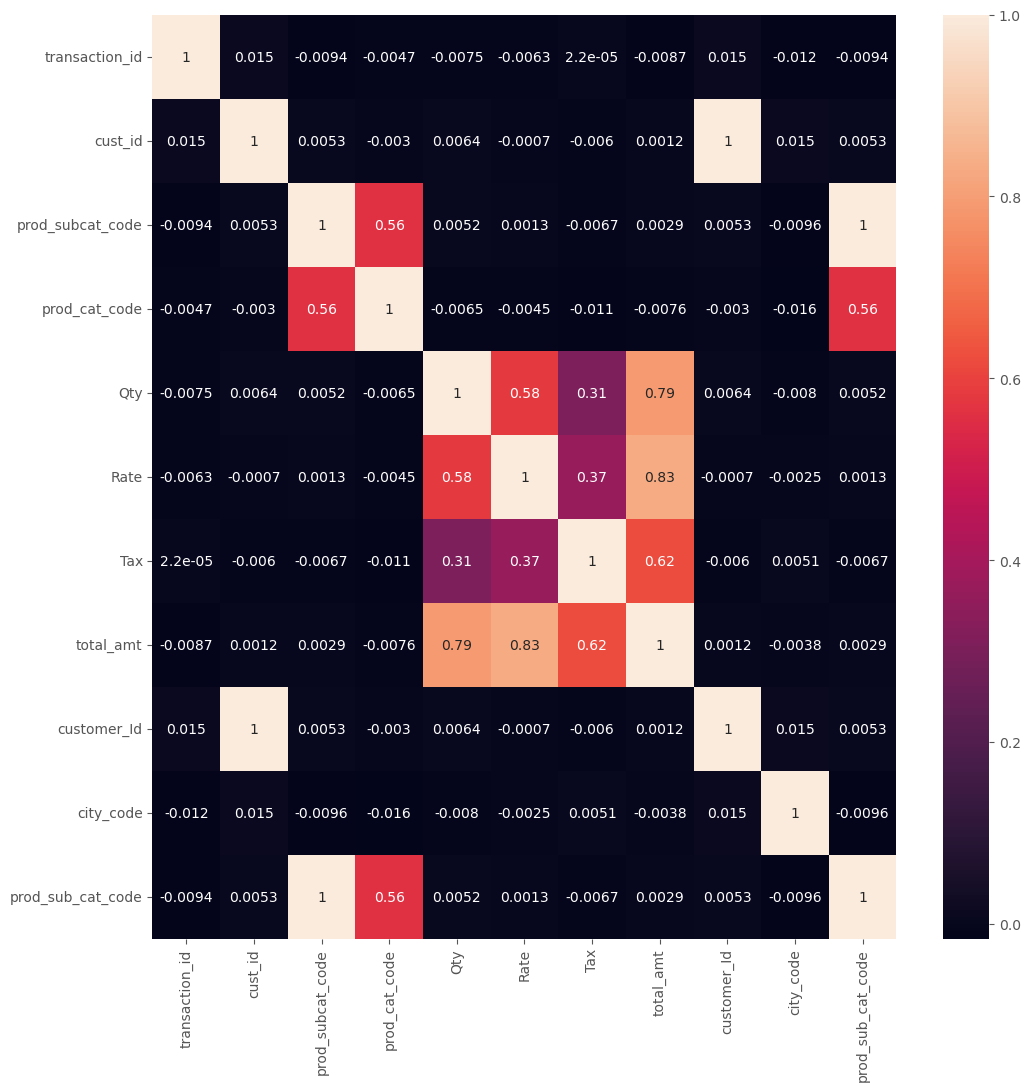

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(Customer_Final.corr(),annot=True)
plt.show()

In [14]:
contineous_column= Customer_Final[["Qty","Rate","Tax","total_amt"]]
category_column = Customer_Final[["Gender","Store_type","prod_cat","prod_subcat"]]

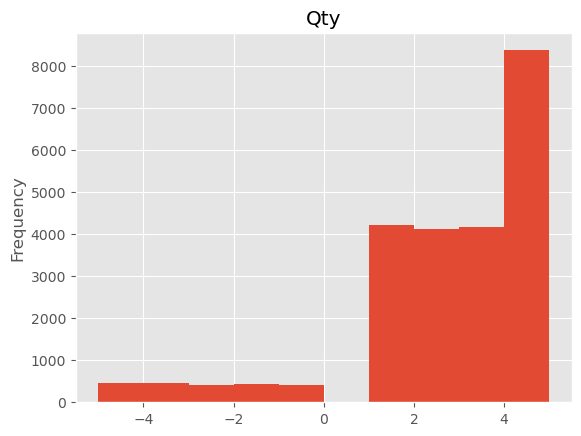

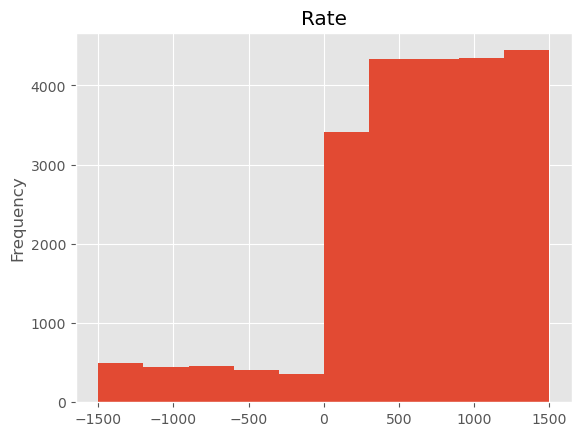

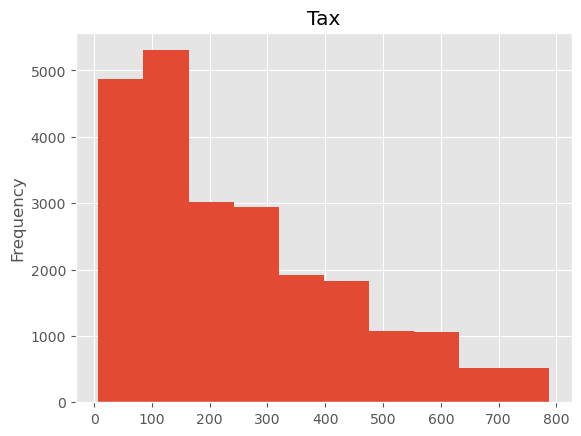

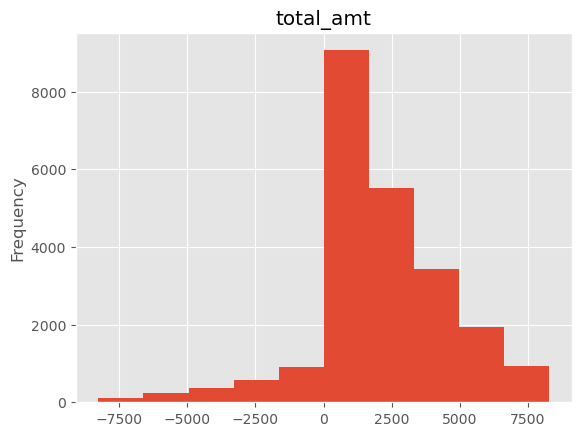

In [15]:
for i in contineous_column.columns:
    contineous_column[i].plot(kind='hist', title = i)
    
    plt.show()

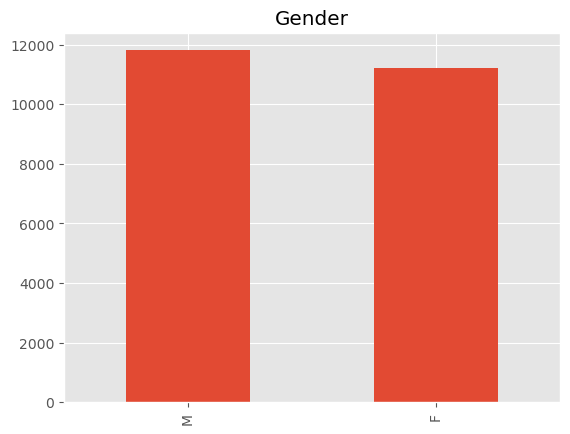

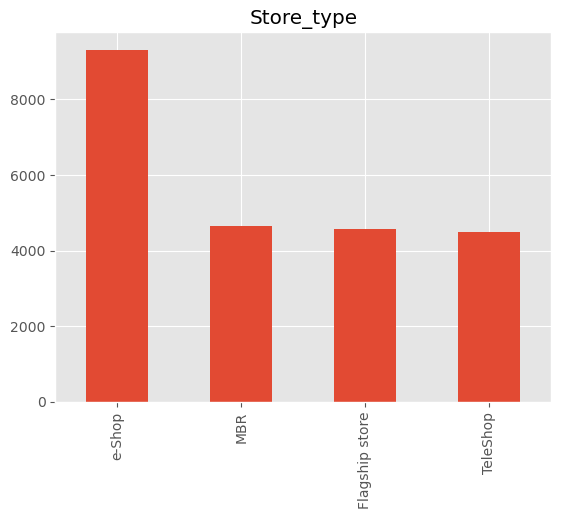

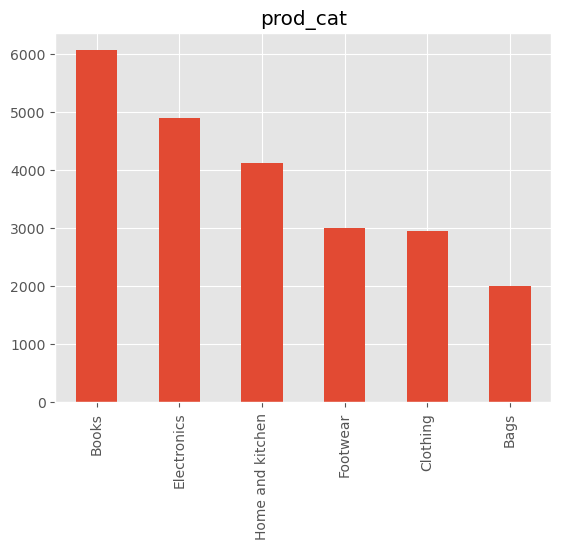

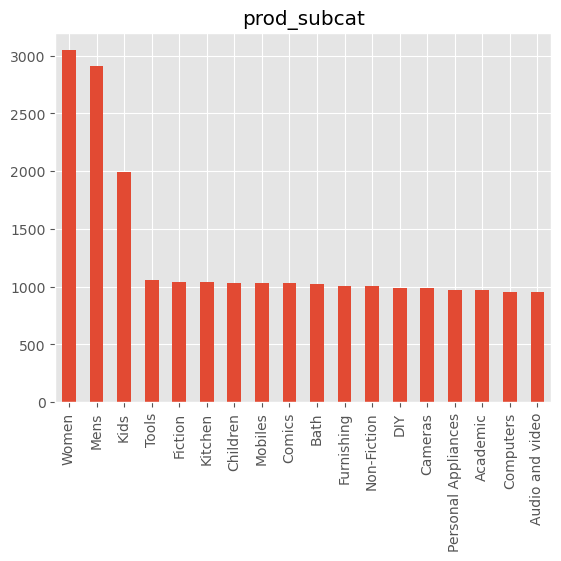

In [17]:
for i in category_column.columns:
    category_column[i].value_counts().plot(kind = 'bar', title = i)
    plt.show()

<h3>4. Calculate the following information using the merged dataset : <br>
 a. Time period of the available transaction data <br>
 b. Count of transactions where the total amount of transaction was negative</h3>

In [18]:
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date, infer_datetime_format=True)

In [19]:
#a

Time_Period = max(Customer_Final.tran_date) - min(Customer_Final.tran_date)

In [20]:
print(f"Time period of data {Time_Period.days} days")

Time period of data 1430 days


In [21]:
#b

count = len(Customer_Final.total_amt[Customer_Final.total_amt<0])
print('Count of transactions where the total amount of transaction was negative :',count)

Count of transactions where the total amount of transaction was negative : 2177


### 5. Analyze which product categories are more popular among females vs male customers.

In [22]:
df = Customer_Final.drop_duplicates(subset=['transaction_id'])
pvt = pd.pivot_table(data=df,
                    columns='Gender',
                    index='prod_cat',
                     values = 'transaction_id',
                     aggfunc='count'
                    )

In [23]:
pvt

Gender,F,M
prod_cat,,
Bags,890,899
Books,2657,2825
Clothing,1286,1388
Electronics,2135,2351
Footwear,1380,1327
Home and kitchen,1810,1922


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [24]:
max_cust = pd.pivot_table(data= customer,
                         index = 'city_code',
                         values = 'customer_Id',
                         aggfunc='count')

In [25]:
max_cust = max_cust.sort_values(by = 'customer_Id',ascending=False).iloc[0:1,:]

In [26]:
best_city_code = max_cust.index[0]
total_cust = max_cust.iloc[0,0]
percent = (total_cust / len(customer))*100
print(f"The City with maximum customer is {best_city_code}, and the percentage of customer from that city is {percent}%")

The City with maximum customer is 3.0, and the percentage of customer from that city is 10.53656808925093%


### 7. Which store type sells the maximum products by value and by quantity?

In [27]:
str_typ = Customer_Final.groupby(['Store_type']).agg({'total_amt':'sum','Qty':'sum'}).reset_index()

In [28]:
str_typ = str_typ.sort_values(by = ['total_amt','Qty'],ascending=False)

In [29]:
print(f"The store type sells the maximum products by value and by quantity is {str_typ.iloc[0,0]}")

The store type sells the maximum products by value and by quantity is e-Shop


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [30]:
tot_amt = Customer_Final[(Customer_Final.Store_type == 'Flagship store')&(Customer_Final.prod_cat.isin(['Electronics','Books']))]

In [31]:
tot_amt = tot_amt['total_amt'].sum()

In [32]:
print(f"Total amount earned from the Electronics and Clothing categories from Flagship Stores is {tot_amt}")

Total amount earned from the Electronics and Clothing categories from Flagship Stores is 4703341.890000001


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [33]:
tot_amt = Customer_Final[(Customer_Final.prod_cat == 'Electronics')&(Customer_Final.Gender == 'M')]

In [34]:
tot_amt = tot_amt.total_amt.sum()

In [35]:
print(f"Total amount earned from the Male customers under the Electronics category is {tot_amt}")

Total amount earned from the Male customers under the Electronics category is 5703109.425000001


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [36]:
posi_tran = Customer_Final[Customer_Final.total_amt > 0]

In [37]:
unique_tran = posi_tran.groupby('customer_Id').agg({'total_amt':'count'}).sort_values('total_amt',ascending=False)

In [38]:
unique_tran = unique_tran[unique_tran.total_amt > 10]

In [39]:
unique_tran

,total_amt
customer_Id,
272741,11
273014,11
266794,11
274227,11
270803,11
270535,11


<h3>11. For all customers aged between 25 - 35, find out:<br>
 a. What was the total amount spent for “Electronics” and “Books” product categories?<br>
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [40]:
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)

In [41]:
Customer_Final["Age"] = (datetime.datetime.now() - Customer_Final.DOB).dt.days // 365.25

In [42]:
New_Cust = Customer_Final[(Customer_Final.Age >25) & (Customer_Final.Age<35)]

In [43]:
New_Cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,Age
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women,33.0
11,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-03-02,F,10.0,Clothing,1,Women,33.0
17,11999444239,268052,2012-06-18,1,1,2,1324,278.040,2926.040,Flagship store,268052,1988-12-18,M,7.0,Clothing,1,Women,34.0
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,Clothing,1,Women,31.0
24,42584381402,270625,2012-06-22,1,1,5,1371,719.775,7574.775,TeleShop,270625,1992-03-02,M,6.0,Clothing,1,Women,31.0


In [44]:
#a

amt_spnd = New_Cust[(New_Cust.prod_cat=='Electronics') | (New_Cust.prod_cat == 'Books')]

In [45]:
amt_spnd = amt_spnd.total_amt.sum()

In [46]:
amt_spnd

4771399.945

In [47]:
print(f"Total amount spent for Electronics and Books product categories is {amt_spnd}")

Total amount spent for Electronics and Books product categories is 4771399.945


In [60]:
#b

New_Cust.tran_date = pd.to_datetime(New_Cust.tran_date)

In [61]:
New_Cust.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,Age
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women,33.0
11,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-03-02,F,10.0,Clothing,1,Women,33.0
17,11999444239,268052,2012-06-18,1,1,2,1324,278.040,2926.040,Flagship store,268052,1988-12-18,M,7.0,Clothing,1,Women,34.0
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,Clothing,1,Women,31.0
24,42584381402,270625,2012-06-22,1,1,5,1371,719.775,7574.775,TeleShop,270625,1992-03-02,M,6.0,Clothing,1,Women,31.0


In [62]:
amount_spnd = New_Cust[(New_Cust.tran_date > '2014-01-01') & (New_Cust.tran_date < '2014-03-01')]

In [63]:
amount_spnd = amount_spnd.total_amt.sum()

In [64]:
amount_spnd

333549.775

In [65]:
print(f'total amount spent between 1st Jan, 2014 to 1st Mar, 2014 is {amount_spnd}')

total amount spent between 1st Jan, 2014 to 1st Mar, 2014 is 333549.775
